In [202]:
# считываем CSV-файл в датафрейм data
data <- read.csv2("C:/Trees/Churn.csv", sep=";")

In [203]:
# смотрим первые 10 наблюдений 
# датафрейма data
head(data, 10)

longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,1
,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,1
<2,<8,Нет,,CC,Мужской,Женат,NA,,1
<2,<8,,Бесплатный,CH,Мужской,Одинокий,NA,<31,0
<2,,Нет,Бесплатный,Auto,,Одинокий,16829.6,<31,1
,<8,Нет,Бесплатный,,Женский,Одинокий,57272.7,<31,1
,<8,Нет,Бюджетный,,Мужской,Женат,NA,<31,1
<2,<8,Нет,Бесплатный,Auto,Мужской,,NA,<31,1
<2,<8,Да,,CH,Мужской,Одинокий,92167.3,<31,1
<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.5,<31,1


In [204]:
# выводим количество пропусков
# по переменной income 
sum(is.na(data$income))

[1] 4

In [205]:
# выводим количество пропусков
# по переменной pay 
sum(is.na(data$pay))

[1] 0

In [206]:
# помечаем пустые строковые
# значения как пропуски 
is.na(data) <- data==''

In [207]:
# выводим первые 10 наблюдений
# датафрейма data 
head(data, 10)

longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,1
NA,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,1
<2,<8,Нет,NA,CC,Мужской,Женат,NA,NA,1
<2,<8,NA,Бесплатный,CH,Мужской,Одинокий,NA,<31,0
<2,NA,Нет,Бесплатный,Auto,NA,Одинокий,16829.6,<31,1
NA,<8,Нет,Бесплатный,NA,Женский,Одинокий,57272.7,<31,1
NA,<8,Нет,Бюджетный,NA,Мужской,Женат,NA,<31,1
<2,<8,Нет,Бесплатный,Auto,Мужской,NA,NA,<31,1
<2,<8,Да,NA,CH,Мужской,Одинокий,92167.3,<31,1
<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.5,<31,1


In [208]:
# выводим количество пропусков
# по переменной pay 
sum(is.na(data$pay))

[1] 2

In [209]:
# фиксируем пустые строковые
# значения как пропуски 
data <- read.csv2("C:/Trees/Churn.csv", sep=";", na.strings="")

In [210]:
# смотрим типы переменных
str(data)

'data.frame':	4431 obs. of  10 variables:
 $ longdist: Factor w/ 5 levels "<2","15-20","2-8",..: 1 NA 1 1 1 NA NA 1 1 1 ...
 $ local   : Factor w/ 5 levels "<8","21-35","36-55",..: 1 1 1 1 NA 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 NA 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 NA 1 1 1 2 1 NA 1 ...
 $ pay     : Factor w/ 4 levels "Auto","CC","CD",..: 2 2 2 4 1 NA NA 1 4 2 ...
 $ gender  : Factor w/ 4 levels "Женский","Женский&*",..: 3 3 3 3 NA 1 3 3 3 3 ...
 $ marital : Factor w/ 5 levels "_Женат","_Одинокий",..: 4 4 4 5 5 5 4 NA 5 4 ...
 $ income  : num  77680 37112 NA NA 16830 ...
 $ agecat  : Factor w/ 5 levels "<31","31-45",..: 1 1 NA 1 1 1 1 1 1 1 ...
 $ churn   : int  1 1 1 0 1 1 1 1 1 1 ...


In [211]:
# преобразовываем переменную
# churn в вектор типа factor 
data$churn <- as.factor(data$churn)

In [212]:
# преобразовываем переменные longdist, local,
# agecat в вектор типа ordered factor 
data$longdist <- ordered(data$longdist, 
                         levels = c("<2", "2-8", "9-14", "15-20", "21+"))
data$local <- ordered(data$local, 
                      levels = c("<8", "8-20", "21-35", "36-55", "56+"))
data$agecat <- ordered(data$agecat, 
                       levels = c("<31", "31-45", "46-58", "59-70", "71+"))


In [213]:
# загружаем пакет dplyr 
library(dplyr)
# c помощью функции recode пакета dplyr
# переименовываем категории переменной marital_status
data$churn <- recode(data$churn, "0"="Остается", "1"="Уходит")


Attaching package: 'dplyr'

The following object is masked from 'package:imputeMissings':

    compute

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [214]:
# отсоединяем пакет dplyr 
detach("package:dplyr", unload=TRUE)

In [215]:
# смотрим типы переменных 
str(data)

'data.frame':	4431 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 NA 1 1 1 NA NA 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 NA 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 NA 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 NA 1 1 1 2 1 NA 1 ...
 $ pay     : Factor w/ 4 levels "Auto","CC","CD",..: 2 2 2 4 1 NA NA 1 4 2 ...
 $ gender  : Factor w/ 4 levels "Женский","Женский&*",..: 3 3 3 3 NA 1 3 3 3 3 ...
 $ marital : Factor w/ 5 levels "_Женат","_Одинокий",..: 4 4 4 5 5 5 4 NA 5 4 ...
 $ income  : num  77680 37112 NA NA 16830 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 NA 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 2 1 2 2 2 2 2 2 ...


In [216]:
# смотрим дублирующиеся наблюдения 
data[duplicated(data),]

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
358,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит
461,<2,<8,Да,Бесплатный,CC,Женский&*,_Одинокий,18831.1,46-58,Уходит
2060,21+,21-35,Нет,Бюджетный,CC,Мужской&*,_Женат,84269.0,31-45,Остается
3161,9-14,56+,Нет,Бюджетный,CC,Мужской&*,_Одинокий,54643.3,31-45,Остается
3834,2-8,21-35,Нет,Бесплатный,Auto,Женский,Же&нат,92353.3,46-58,Остается
4382,15-20,21-35,Нет,Бесплатный,CC,Женский&*,_Женат,87404.6,46-58,Уходит
4431,21+,8-20,Нет,Бесплатный,CC,Женский&*,_Одинокий,75639.8,31-45,Остается


In [217]:
# проверим, дублируется ли наблюдение 
# по заданному набору условий  
data[data$longdist == "<2" & data$local == "<8" & data$int_disc =="Нет" & 
       data$billtype =="Бюджетный" & data$pay =="CC" &  data$gender =="Женский&*" & 
       data$marital =="_Женат" & data$income == 32118.4 & data$agecat =="71+" & 
       data$churn =="Уходит", ]

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
348,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит
358,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит


In [218]:
# оставим только уникальные наблюдения  
data <- unique(data)
# смотрим, сколько наблюдений мы
# теперь будем использовать  
nrow(data)

[1] 4424

In [219]:
# загружаем пакет Hmisc  
library(Hmisc)
# с помощью функции describe пакета
# Hmisc выведем подробную информацию
# о переменных
describe(data)


Attaching package: 'Hmisc'

The following object is masked from 'package:imputeMissings':

    impute

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



data 

 10  Variables      4424  Observations
--------------------------------------------------------------------------------
longdist 
       n  missing distinct 
    4421        3        5 
                                        
Value         <2   2-8  9-14 15-20   21+
Frequency    736   867   993  1054   771
Proportion 0.166 0.196 0.225 0.238 0.174
--------------------------------------------------------------------------------
local 
       n  missing distinct 
    4423        1        5 
                                        
Value         <8  8-20 21-35 36-55   56+
Frequency    738   763  1444   738   740
Proportion 0.167 0.173 0.326 0.167 0.167
--------------------------------------------------------------------------------
int_disc 
       n  missing distinct 
    4423        1        2 
                      
Value         Да   Нет
Frequency   1376  3047
Proportion 0.311 0.689
--------------------------------------------------------------------------------
billtype 
     

In [220]:
# создаем числовой ряд  
series <- c(18, 20, 23, 20, 23, 27, 24, 23, 29)
# вычисляем медиану  
median(series)

[1] 23

In [221]:
# вычисляем медиану  
quantile(series, 0.50)

50% 
 23

In [222]:
# вычисляем 0.25-квантиль  
quantile(series, 0.25)

25% 
 20

In [223]:
# создаем вектор названий переменных  
names <- c("gender", "marital")
# с помощью функции lapply применяем
# функцию summary к переменным, названия
# которых записаны в векторе names  
lapply(data[,names], function(x) summary(x))

$gender
  Женский Женский&*   Мужской Мужской&*      NA's 
     2235         4      2182         2         1 

$marital
   _Женат _Одинокий    Же&нат     Женат  Одинокий      NA's 
        3         3         1      2620      1796         1

In [224]:
# с помощью функции lapply применяем
# функцию levels к переменным, названия
# которых записаны в векторе names  
lapply(data[,names], function(x) levels(x))

$gender
[1] "Женский"   "Женский&*" "Мужской"   "Мужской&*"

$marital
[1] "_Женат"    "_Одинокий" "Же&нат"    "Женат"     "Одинокий"

In [225]:
# преобразовываем переменную gender из вектора типа factor
# в вектор типа character (нельзя напрямую изменить строковое
# значение фактора, потому что в факторе под капотом для строковых 
# значений используются целочисленные коды, поэтому переводим в 
# вектор типа character, у которого значения – строки)
data$gender <- as.character(data$gender)

# удаляем с помощью функции gsub символы & и *,
# первый аргумент – удаляемые символы, второй
# аргумент – символы, на которые нужно заменить,
# третий аргумент – вектор типа character или строка 
data$gender <- gsub('\\&\\*', "", data$gender)

In [226]:
# преобразовываем переменную gender обратно из вектора
# типа character в вектор типа factor
data$gender <- as.factor(data$gender)

In [227]:
# загружаем пакет stringr
library(stringr)

# преобразовываем переменную marital из вектора типа factor
# в вектор типа character
data$marital <- as.character(data$marital)

# удаляем с помощью функции str_replace_all пакета stringr
# все символы, не являющиеся буквами алфавита и числами
# первый аргумент – вектор типа character или строка,
# второй аргумент – символы, которые нужно удалить,
# третий аргумент – символы, на которые нужно заменить
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")

# преобразовываем переменную marital обратно из вектора
# типа character в вектор типа factor
data$marital <- as.factor(data$marital) 

In [228]:
# снова выводим информацию об уровнях переменной
lapply(data[,names], function(x) levels(x))

$gender
[1] "Женский" "Мужской"

$marital
[1] "Женат"    "Одинокий"

In [229]:
# выводим информацию о распределении
# значений переменной pay
summary(data$pay)

Auto   CC   CD   CH NA's 
 889 2554    2  977    2

In [230]:
# загружаем пакет car
library(car)
# с помощью функции recode пакета car
# объединяем редкую категорию CD с
# самой часто встречающейся
# категорией CC
data$pay <- recode(data$pay, "'CD'='CC'")
# снова выводим информацию о распределении
# значений переменной pay
summary(data$pay)

Auto   CC   CH NA's 
 889 2556  977    2

In [231]:
# отсоединяем пакет Hmisc
detach("package:Hmisc", unload=TRUE)

In [232]:
# разбиваем набор данных на случайную 
# и контрольную выборки
set.seed(42)

data$random_number <- runif(nrow(data),0,1)
development <- data[ which(data$random_number > 0.3), ]
holdout <- data[ which(data$random_number <= 0.3), ]

data$random_number <- NULL
development$random_number <- NULL
holdout$random_number <- NULL

In [233]:
# смотрим обучающий датафрейм 
str(development)

'data.frame':	3080 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 NA 1 1 NA NA 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 NA 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 NA 2 2 2 1 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 2 NA 1 1 2 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 3 1 NA NA 3 2 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 NA 1 2 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 2 2 2 1 2 1 2 1 ...
 $ income  : num  77680 37112 NA 16830 57273 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 2 1 2 ...


In [234]:
# смотрим контрольный датафрейм 
str(holdout)

'data.frame':	1344 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 2 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": NA 1 1 1 1 1 1 1 2 1 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 1 2 1 3 1 2 1 2 1 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 1 1 2 1 2 2 2 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 NA 2 2 1 2 2 2 1 2 ...
 $ income  : num  NA NA 24458 50969 25949 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: NA 1 1 1 1 1 2 3 3 3 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 1 2 1 ...


In [235]:
# выводим информацию о распределении
# классов зависимой переменной churn
# в обучающей выборке
summary(development$churn)

Остается   Уходит 
    1746     1334

In [236]:
# выводим информацию о распределении
# классов зависимой переменной churn
# в контрольной выборке
summary(holdout$churn)

Остается   Уходит 
     746      598

In [237]:
# выведем информацию о пропусках
# в обучающей выборке
sapply(development, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       3        1        1        1        2        1        0        2 
  agecat    churn 
       0        0

In [238]:
# выведем информацию о пропусках
# в контрольной выборке
sapply(holdout, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        1        0        0        1        2 
  agecat    churn 
       1        0

In [239]:
# выведем информацию о пропусках в обучающей выборке
# c помощью lapply, теперь результат будет
# возвращен в виде списка
lapply(development, function(x) sum(is.na(x)))

$longdist
[1] 3

$local
[1] 1

$int_disc
[1] 1

$billtype
[1] 1

$pay
[1] 2

$gender
[1] 1

$marital
[1] 0

$income
[1] 2

$agecat
[1] 0

$churn
[1] 0

In [240]:
# выведем информацию о пропусках в контрольной выборке
# c помощью lapply, теперь результат будет
# возвращен в виде списка
lapply(holdout, function(x) sum(is.na(x)))

$longdist
[1] 0

$local
[1] 0

$int_disc
[1] 0

$billtype
[1] 1

$pay
[1] 0

$gender
[1] 0

$marital
[1] 1

$income
[1] 2

$agecat
[1] 1

$churn
[1] 0

In [241]:
# вычисляем среднее значение
# переменной income
mean(development$income, na.rm = TRUE)

[1] 50184.27

In [242]:
# выполняем импутацию пропусков с помощью среднего, обратите
# внимание, среднее было вычислено отдельно для
# каждой выборки
development$income[is.na(development$income)] <- mean(development$income, na.rm=TRUE)
holdout$income[is.na(holdout$income)] <- mean(holdout$income, na.rm=TRUE)

In [243]:
# выведем первые 10 наблюдений 
# датафрейма development 
head(development, 10)

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
1,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.00,<31,Уходит
2,NA,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.50,<31,Уходит
4,<2,<8,NA,Бесплатный,CH,Мужской,Одинокий,50184.27,<31,Остается
5,<2,NA,Нет,Бесплатный,Auto,NA,Одинокий,16829.60,<31,Уходит
6,NA,<8,Нет,Бесплатный,NA,Женский,Одинокий,57272.70,<31,Уходит
7,NA,<8,Нет,Бюджетный,NA,Мужской,Женат,50184.27,<31,Уходит
9,<2,<8,Да,NA,CH,Мужской,Одинокий,92167.30,<31,Уходит
10,<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.50,<31,Уходит
11,<2,<8,Нет,Бесплатный,CH,Мужской,Одинокий,18831.10,<31,Остается
12,<2,<8,Нет,Бюджетный,CC,Женский,Женат,19654.90,<31,Уходит


In [244]:
# создаем индикатор пропусков, у функции ifelse первый аргумент –
# проверяемое условие (является ли наблюдение переменной billtype
# пропущенным), второй аргумент – значение, которое возвращается,
# если условие выполняется, третий аргумент – значение, которое
# возвращается, если условие не выполняется
development$billtype_ind <- ifelse(is.na(development$billtype), 1, 0)

In [245]:
# выводим первые 10 наблюдений новой
# переменной billtype_ind
head(development[,"billtype_ind"], 10)

[1] 0 0 0 0 0 0 1 0 0 0

In [246]:
# удаляем переменную billtype_ind
development$billtype_ind <- NULL

In [247]:
# с помощью функции recode пакета car запишем пропуски
# в отдельную категорию MISSING
development$billtype2 <- recode(development$billtype, "NA='MISSING'")
# смотрим первые 10 наблюдений переменной billtype2
head(development[,"billtype2"], 10)

[1] Бюджетный  Бесплатный Бесплатный Бесплатный Бесплатный Бюджетный 
 [7] MISSING    Бесплатный Бесплатный Бюджетный 
Levels: MISSING Бесплатный Бюджетный

In [248]:
# удаляем переменную billtype2
development$billtype2 <- NULL

In [249]:
# с помощью функции lapply преобразовываем переменные 
# longdist, local и agecat в неупорядоченные
# факторы
names <- c("longdist", "local", "agecat")
development[,names] <- lapply(development[,names], factor, ordered=FALSE)
holdout[,names] <- lapply(holdout[,names], factor, ordered=FALSE)

In [250]:
# загружаем пакет imputeMissings
library(imputeMissings)
# с помощью функции compute пакета
# imputeMissings вычисляем моды и
# медианы для импутации
values <- compute(development)
print(values)

$longdist
[1] "15-20"

$local
[1] "21-35"

$int_disc
[1] "Нет"

$billtype
[1] "Бюджетный"

$pay
[1] "CC"

$gender
[1] "Мужской"

$marital
[1] "Женат"

$income
[1] 50290.7

$agecat
[1] "31-45"

$churn
[1] "Остается"



In [184]:
# выводим сводку о количестве пропусков в
# каждой переменной с помощью функции
# colSums пакета imputeMissings
colSums(is.na(development))

longdist    local int_disc billtype      pay   gender  marital   income 
       3        1        1        1        2        1        0        0 
  agecat    churn 
       0        0

In [185]:
# выполняем автоматическую импутацию с помощью
# функции impute пакета imputeMissings
development <- impute(development, method = "median/mode")
holdout <- impute(holdout, method = "median/mode")

In [186]:
# с помощью функции ordered преобразовываем переменные 
# longdist, local и agecat обратно в упорядоченные
# факторы
development$longdist <- ordered(development$longdist, 
                                levels = c("<2", "2-8", "9-14", "15-20", "21+"))
development$local <- ordered(development$local, 
                             levels = c("<8", "8-20", "21-35", "36-55", "56+"))
development$agecat <- ordered(development$agecat, 
                              levels = c("<31", "31-45", "46-58", "59-70", "71+"))
holdout$longdist <- ordered(holdout$longdist, 
                            levels = c("<2", "2-8", "9-14", "15-20", "21+"))
holdout$local <- ordered(holdout$local, 
                         levels = c("<8", "8-20", "21-35", "36-55", "56+"))
holdout$agecat <- ordered(holdout$agecat, 
                          levels = c("<31", "31-45", "46-58", "59-70", "71+"))

In [187]:
# выводим информацию о пропусках в обучающей выборке
sapply(development, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0

In [188]:
# выводим информацию о пропусках в контрольной выборке
sapply(holdout, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0

In [189]:
# выводим диапазон значений 
# переменной income
range(development$income)

[1]   110.28 99832.90

In [190]:
# разбиваем переменную income на 10 интервалов
# одинаковой ширины
development$binned <-cut(x=development$income, breaks=seq(0, 100000, by=10000), 
                         include.lowest=TRUE, right=TRUE, 
                         ordered_result=TRUE, dig.lab = 6)

In [191]:
# смотрим распределение значений
# переменной binned
summary(development$binned)

[0,10000]  (10000,20000]  (20000,30000]  (30000,40000]  (40000,50000] 
           278            321            307            307            283 
 (50000,60000]  (60000,70000]  (70000,80000]  (80000,90000] (90000,100000] 
           382            319            268            308            307

In [192]:
# загружаем пакет lsr
library(lsr)
# с помощью функции quantileCut пакета lsr разбиваем
# переменную income на 10 интервалов c одинаковым
# количеством наблюдений
development$binned2 <- quantileCut(x=development$income, n=10, 
                                   include.lowest=TRUE, right=TRUE, 
                                   ordered_result=TRUE, dig.lab=6)

In [193]:
# смотрим распределение значений
# переменной binned2
summary(development$binned2)

[10.5574,11254.7] (11254.7,20806.8] (20806.8,30901.3]   (30901.3,40756] 
              308               308               310               306 
  (40756,50290.7] (50290.7,58990.9]   (58990.9,68767]   (68767,79962.5] 
              341               275               309               307 
(79962.5,89931.5] (89931.5,99932.6] 
              308               308

In [194]:
# смотрим типы переменных
str(development)

'data.frame':	3080 obs. of  12 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 4 1 1 4 4 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 3 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 1 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 2 2 1 1 2 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 3 1 2 2 3 2 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 2 1 2 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 2 2 2 1 2 1 2 1 ...
 $ income  : num  77680 37112 50184 16830 57273 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 2 1 2 ...
 $ binned  : Ord.factor w/ 10 levels "[0,10000]"<"(10000,20000]"<..: 8 4 6 2 6 6 10 4 2 2 ...
 $ binned2 : Ord.factor w/ 10 levels "[10.5574,11254.7]"<..: 8 4 5 2 6 5 10 4 2 2 ...


In [195]:
# удаляем только что созданные переменные
development$binned <- NULL
development$binned2 <- NULL

In [196]:
# выполняем биннинг с учетом полученных правил разбиения
development$income <-cut(x=development$income, 
                         breaks=c(-Inf,11000,21000,31000,41000,
                                  50000,59000,69000,80000,
                                  90000,+Inf), 
                         include.lowest=TRUE, 
                         ordered_result=TRUE)

holdout$income <-cut(x=holdout$income, 
                     breaks=c(-Inf,11000,21000,31000,41000,
                              50000,59000,69000,80000,
                              90000,+Inf), 
                     include.lowest=TRUE, 
                     ordered_result=TRUE)

In [197]:
# загружаем пакет CHAID
library(CHAID)

In [198]:
# задаем набор условий для построения дерева CHAID
params <- chaid_control(minprob = 0.01, minsplit = 1000, minbucket = 500)
# строим модель дерева CHAID
chd  <- chaid(churn ~ ., control = params, development)

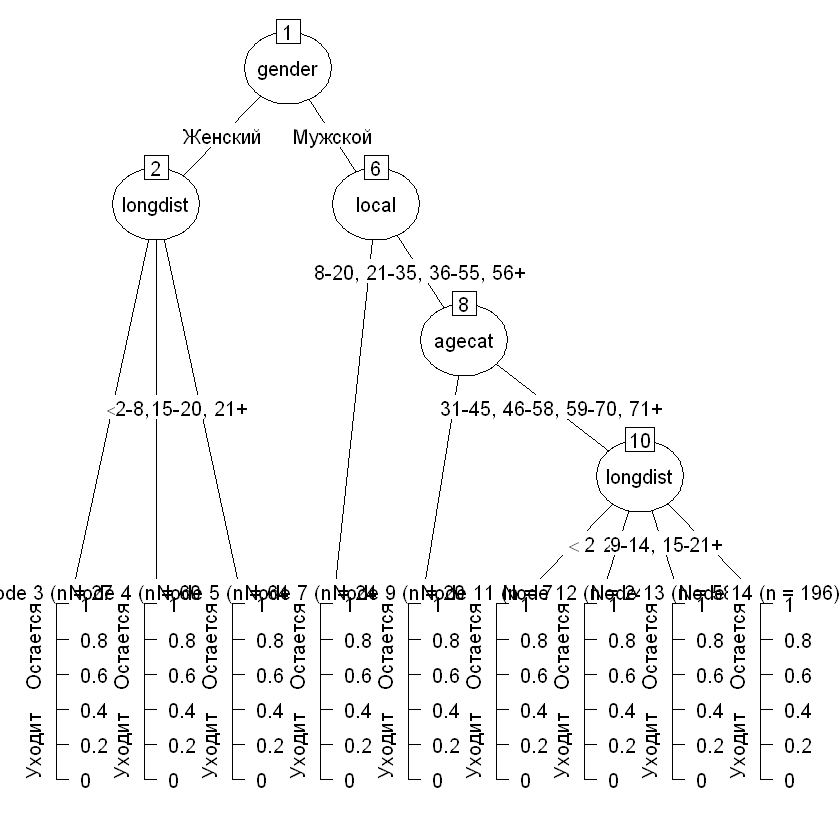

In [199]:
plot(chd)

In [200]:
print(chd)


Model formula:
churn ~ longdist + local + int_disc + billtype + pay + gender + 
    marital + income + agecat

Fitted party:
[1] root
|   [2] gender in Женский
|   |   [3] longdist <2: Уходит (n = 279, err = 7.9%)
|   |   [4] longdist in 2-8, 9-14: Уходит (n = 608, err = 34.4%)
|   |   [5] longdist in 15-20, 21+: Уходит (n = 644, err = 42.7%)
|   [6] gender in Мужской
|   |   [7] local <8: Уходит (n = 248, err = 44.4%)
|   |   [8] local in 8-20, 21-35, 36-55, 56+
|   |   |   [9] agecat <31: Остается (n = 205, err = 31.2%)
|   |   |   [10] agecat in 31-45, 46-58, 59-70, 71+
|   |   |   |   [11] longdist <2: Остается (n = 70, err = 4.3%)
|   |   |   |   [12] longdist in 2-8: Остается (n = 248, err = 13.3%)
|   |   |   |   [13] longdist in 9-14, 15-20: Остается (n = 582, err = 7.4%)
|   |   |   |   [14] longdist in 21+: Остается (n = 196, err = 14.3%)

Number of inner nodes:    5
Number of terminal nodes: 9
